 Importation des Données, Exploration et Nettoyage

In [1]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

Collecte des données et infos générales

In [4]:
data = pd.read_excel("/Users/marthaavilas/Downloads/Bike_Sales_Data_.xlsx")

In [8]:
data.info()  #Affiche les colonnes, les lignes , les valeurs nulls et les types de lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               192 non-null    datetime64[ns]
 1   Sales              192 non-null    int64         
 2   Temperature        192 non-null    float64       
 3   Unemployment_Rate  192 non-null    float64       
 4   Consumer_Index     192 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 7.6 KB


Interprétation des Informations des Données :

Date : Il s'agit d'une colonne de type datetime64, ce qui signifie qu'elle contient des informations de date.

Sales : Cette colonne contient des valeurs entières (int64) représentant les ventes de vélos. C'est notre variable cible, celle que nous cherchons à prédire.

Temperature : Colonne de type float64, représentant la température moyenne. 

Unemployment_Rate : Colonne de type float64, indiquant le taux de chômage.

Consumer_Index : Colonne de type float64, représentant l'indice de consommation. 

Nombre d'Entrées : Nous avons 192 lignes.

Absence de Valeurs Manquantes : D'après data.info(), toutes les colonnes ont 192 valeurs non nulles, donc aucune donnée manquante.

Types de Données : Les types de données semblent corrects pour l'analyse : les dates sont en datetime64 et les autres variables en float64 ou int64.

Data columns : total de 5 columns Date,	Sales, Temperature,	Unemployment_Rate, Consumer_Index

In [11]:
data.head() #Revision du dataframe et comprendre l'estrucutre des données

,Date,Sales,Temperature,Unemployment_Rate,Consumer_Index
0,2007-01-01,1439,19.9,8.1,97.0
1,2007-02-01,1412,22.8,7.2,98.6
2,2007-03-01,1431,22.1,8.1,95.6
3,2007-04-01,1388,20.7,8.4,91.3
4,2007-05-01,1374,23.5,6.9,96.4


Affichage des stats descriptives

In [14]:
# Affichage des statistiques et détection d'eventuelles valeurs aberrantes
print('Info statistique des data')
data.describe().round(2)

Info statistique des data


,Date,Sales,Temperature,Unemployment_Rate,Consumer_Index
count,192,192.00,192.00,192.00,192.00
mean,2014-12-16 05:00:00,1517.37,21.70,6.52,5539.50
min,2007-01-01 00:00:00,862.00,2.00,4.20,90.50
25%,2010-12-24 06:00:00,1182.00,9.78,5.70,97.07
50%,2014-12-16 12:00:00,1522.00,19.75,6.50,100.20
75%,2018-12-08 18:00:00,1834.00,30.40,7.30,103.10
max,2022-12-01 00:00:00,2198.00,316.80,8.70,1044452.20
std,NaN,357.10,24.06,0.97,75369.62


Sales : Le nombre moyen de vélos vendus est de 1517. Le minimum est de 862, tandis que le maximum atteint 2198. En observant le dernière quartile, on peut constater que des valeurs de ventes sont de 1834, suggérant des périodes de forte demande. La médiane est de 1522, ce qui indique une répartition assez équilibrée autour de la moyenne.

Temperature : La température moyenne est de 21.7°C, avec un minimum de 2°C et un maximum de 316.8°C. Ce maximum est probablement une valeur aberrante. En se concentrant sur les quartiles, on remarque que les valeurs se situent entre 9.78°C et 30.4°C, ce qui est plus réaliste. La médiane est de 19.75°C, reflétant une température modérée dans la majorité des cas.

Unemployment_Rate : Le taux de chômage moyen est de 6.52%, avec un minimum de 4.2% et un maximum de 8.7%. En se basant sur le dernier quartile, 25 % des valeurs de taux de chômage sont de 7.3%, ce qui pourrait correspondre à des périodes économiques plus difficiles. La médiane est de 6.5%, indiquant une répartition stable.

Consumer_Index : L’indice de consommation moyen est de 5539.5, ce qui est très élevé. Les valeurs vont de 90.5 à 1044452.2, cette dernière étant probablement une valeur aberrante. Le dernier quartile nous montre que 25 % des valeurs de cet indice sont de 103.1, alors que la médiane est de 100.2. Ces valeurs suggèrent que, en excluant l'outlier, l'indice de consommation est généralement stable autour de 100.

Vérification des valeurs aberrantes avec les graphiques pertinents.

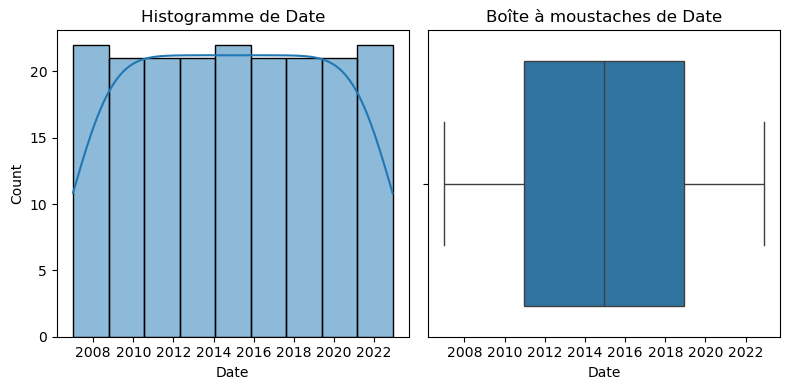

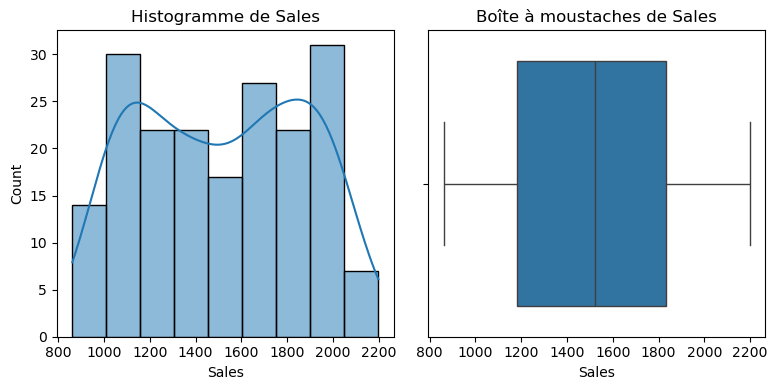

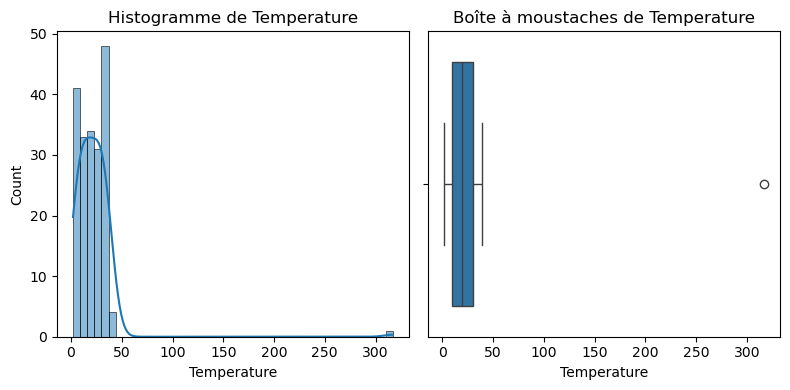

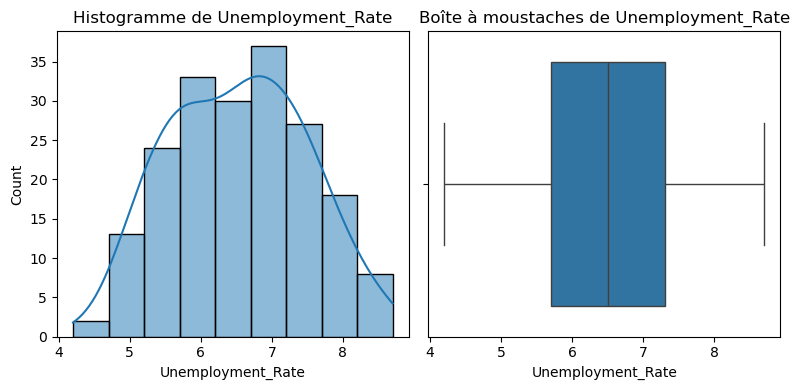

In [ ]:
# Visualisation de la distribution de chaque variable quantitative
for col in data.select_dtypes(include=[ 'float64', 'int64', 'datetime64']).columns:
    plt.figure(figsize=(8, 4))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogramme de {col}')
    
    # Boîte à moustaches pour identifier les valeurs aberrantes
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boîte à moustaches de {col}')
        
    
    plt.tight_layout()
    plt.show()


Date (Histogramme et Boxplot) :

La distribution des données de la variable Date montre une répartition relativement uniforme sur la période de 2007 à 2022.

Le boxplot confirme que les données couvrent bien toute cette période sans valeurs aberrantes (outliers), avec une répartition équilibrée des dates de ventes. 

Sales (Histogramme et Boxplot) :

L'histogramme de Sales montre une distribution des ventes allant de 800 à 2200 unités environ, avec une concentration autour de 1500 à 1800 ventes.

Le boxplot montre une absence de valeurs aberrantes, ce qui signifie que toutes les valeurs sont assez homogènes et dans une plage attendue.

On observe que les valeurs sont majoritairement regroupées entre 1200 et 1800 ventes, ce qui pourrait refléter une demande relativement stable au fil du temps.

Temperature (Histogramme et Boxplot) :

L'histogramme montre que la majorité des températures sont regroupées entre 0 et 40 degrés environ, avec une concentration élevée autour de 30 degrés.  Mais la courbe de densité  va jusqu’à 300 degrés ce qui semble être un otlier.

Le boxplot aussi révèle un outlier important au-delà de 300 degrés, ce qui semble anormal. Cette valeur atypique pourrait être le résultat d'une erreur de saisie ou de mesure, car elle est très éloignée des autres observations.

Unemployment_Rate (Histogramme et Boxplot) :

L'histogramme montre une répartition relativement symétrique, centrée autour de 6% à 7%, ce qui indique que la plupart des taux de chômage se situent dans cette plage.

Le boxplot montre que les valeurs sont globalement concentrées entre 5% et 8% sans outliers marqués, suggérant une distribution normale des taux de chômage.

Consumer_Index (Histogramme et Boxplot) :

L'histogramme du Consumer_Index a une distribution centrée autour de la valeur 100, montrant une répartition principalement symétrique avec la majorité des valeurs entre 95 et 105. Cela indique une stabilité de l’indice de consommation pour la plupart des observations.

Le boxplot a la majorité des valeurs dans la plage normale, mais le point en dehors des moustaches suggère une valeur aberrante, c'est-à-dire une observation inhabituelle par rapport au reste de l'échantillon.

Nettoyage et Préparation des données

In [16]:
# Tri des data par ordre décroissant par rapport à la colonne temperature

data.sort_values(by =["Temperature"], ascending=False).round(2)

,Date,Sales,Temperature,Unemployment_Rate,Consumer_Index
182,2022-03-01,1953,316.8,5.3,107.3
46,2010-11-01,1962,39.2,7.3,93.2
60,2012-01-01,1797,38.6,7.6,100.5
53,2011-06-01,1953,38.6,7.7,98.3
48,2011-01-01,2025,37.2,7.7,92.9
...,...,...,...,...,...
133,2018-02-01,1299,3.9,5.7,97.9
154,2019-11-01,1224,3.4,6.2,96.0
135,2018-04-01,1214,2.9,5.6,102.0
152,2019-09-01,1110,2.8,5.1,104.3


In [18]:

data.sort_values(by =["Consumer_Index"], ascending=False).round(2)


,Date,Sales,Temperature,Unemployment_Rate,Consumer_Index
87,2014-04-01,1163,24.4,6.5,1044452.2
175,2021-08-01,2105,9.7,4.8,113.7
184,2022-05-01,1966,15.8,5.5,110.3
157,2020-02-01,1337,8.3,5.2,109.4
167,2020-12-01,1682,10.2,5.8,108.6
...,...,...,...,...,...
21,2008-10-01,1246,28.7,8.3,92.4
47,2010-12-01,2021,34.7,7.2,92.2
99,2015-04-01,1740,20.3,6.9,91.6
3,2007-04-01,1388,20.7,8.4,91.3


Dans cette partie du code, nous avons trié les données par ordre décroissant de la colonne "Consumer_Index".

Interprétation du valeur aberrante (Outlier) : On observe une valeur particulièrement élevée du Consumer_Index à 1044452.2 en avril 2014 (index 87). Cette valeur est très élevée par rapport aux autres, qui sont toutes autour de 90 à 113. Cela indique qu'il s'agit probablement d'une valeur aberrante.


In [20]:
data = data.drop(index=182) 
data = data.drop(index=87) 

Suppression des Valeurs Aberrantes :

Nous avons supprimé deux valeurs aberrantes en utilisant les index 182 et 87 avec la commande data.drop(index=...). Ces valeurs avaient été identifiées dans les étapes précédentes comme étant exceptionnellement élevées dans les colonnes "Temperature" et "Consumer_Index". Les retirer permet de réduire leur impact potentiellement déstabilisant sur les statistiques globales et les modèles d'analyse.

In [22]:
data.describe().round(1)

,Date,Sales,Temperature,Unemployment_Rate,Consumer_Index
count,190,190.0,190.0,190.0,190.0
mean,2014-12-03 17:18:18.947368448,1516.9,20.1,6.5,100.1
min,2007-01-01 00:00:00,862.0,2.0,4.2,90.5
25%,2010-12-08 18:00:00,1185.0,9.7,5.7,97.0
50%,2014-12-16 12:00:00,1522.0,19.6,6.6,100.2
75%,2018-11-23 12:00:00,1829.5,30.4,7.3,103.0
max,2022-12-01 00:00:00,2198.0,39.2,8.7,113.7
std,NaN,356.7,11.0,1.0,4.1


Interprétation des Résultats :

Sales : La moyenne des ventes (1516.9) montre une tendance globale, tandis que la médiane (1522.0) est proche, ce qui suggère une distribution des ventes relativement symétrique.

Temperature : La température moyenne est de 20.1, mais elle présente une forte variation avec un minimum de 2.0 et un maximum de 39.2, ce qui peut être lié aux différentes saisons dans les données.

Unemployment_Rate : Le taux de chômage varie de 4.2 à 8.7, avec une moyenne de 6.5, ce qui indique une variation modérée dans le contexte économique.

Consumer_Index : Après suppression de l’outlier, l’indice de consommation varie entre 90.5 et 113.7, avec une moyenne de 100.1, ce qui montre des valeurs beaucoup plus cohérentes et réduites.

Ces statistiques, après nettoyage, offrent une base plus fiable pour l’analyse et permettent d’atténuer l’influence des valeurs aberrantes dans les étapes d’analyse et de modélisation futures.

Contrôle de la suppression de l'index par un graphique type nuage de points

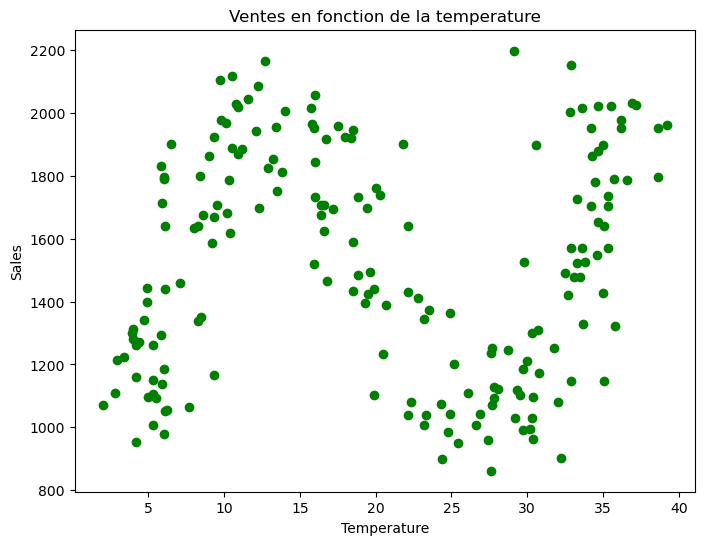

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Temperature'], data['Sales'],color='green')
plt.title('Ventes en fonction de la temperature')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.show()

Dans ce graphique en nuage de points, nous avons la variable Temperature en X et Sales en Y, sans l’outlier de temperature 316.8 qui avait été détecté précédemment.

Le graphique montre que les ventes semblent varier en fonction de la température, mais sans suivre une tendance linéaire simple.

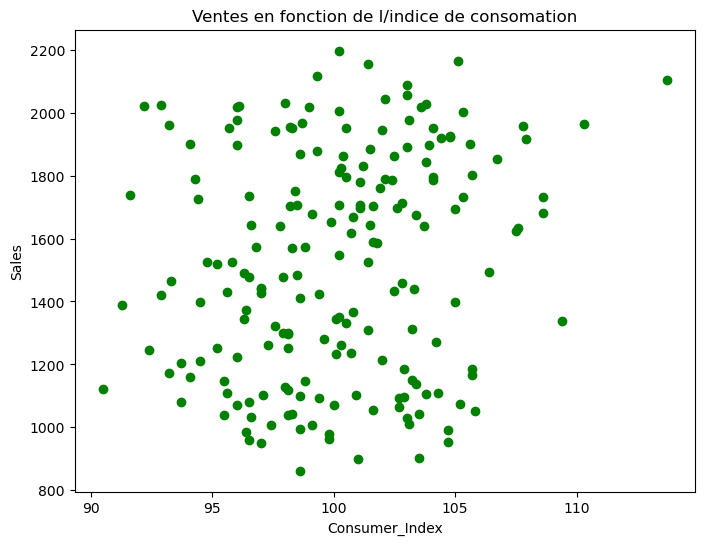

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Consumer_Index'], data['Sales'],color='green')
plt.title('Ventes en fonction de l/indice de consomation')
plt.xlabel('Consumer_Index')
plt.ylabel('Sales')
plt.show()

Dans ce graphique en nuage de points, nous avons la variable Consumer_index en X et Sales en Y, sans l’outlier de Consumer_Index 1044452.2 qui avait été détecté précédemment.

Les points sont répartis de manière assez homogène et sans tendance claire. Cela indique que l'indice de consommation ne semble pas avoir de relation linéaire forte ou directe avec les ventes dans cet ensemble de données.

Analyse et Modélisation

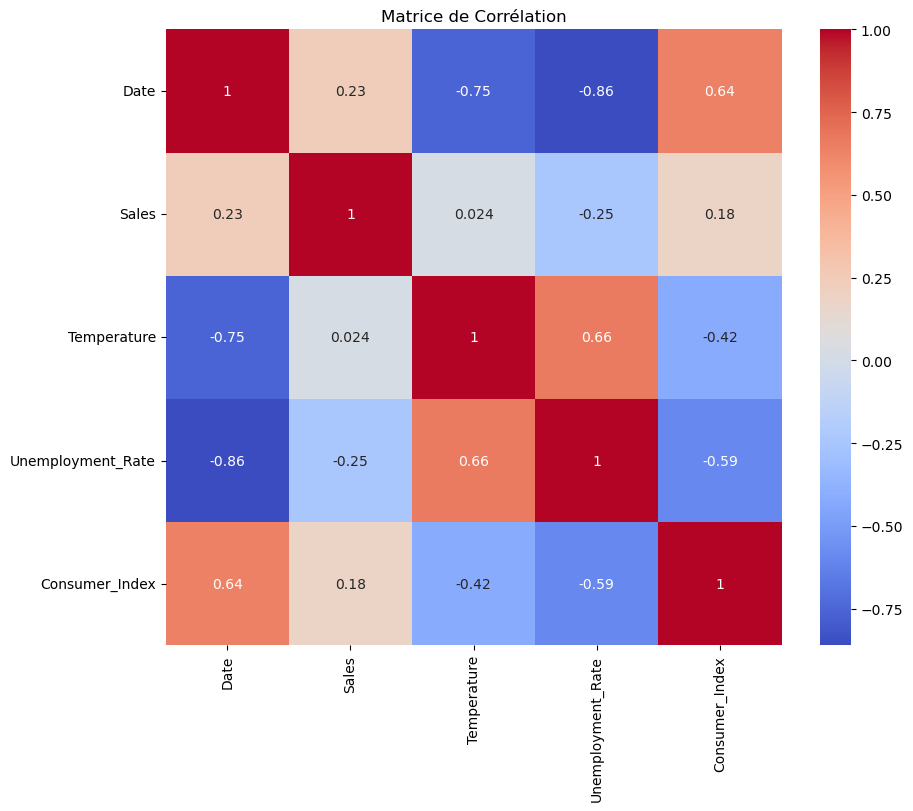

In [47]:
# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Visualisation de la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Matrice de Corrélation")
plt.show()

Analyse des Corrélations avec Sales

Ventes (Sales) : A une très faible corrélation avec les autres variables, indiquant que ces dernières n’ont pas une influence directe forte sur les ventes, mais leur impact pourrait se révéler utile lorsqu’elles sont combinées dans un modèle prédictif.

Température : Une très faible corrélation avec les ventes (0.024), mais une corrélation positive avec le taux de chômage (0.66), ce qui pourrait indiquer une certaine relation indirecte entre la météo et l’activité économique.

Taux de chômage (Unemployment_Rate) : Légère corrélation négative avec les ventes (-0.25), ce qui peut suggérer que les ventes diminuent lorsque le taux de chômage est élevé, bien que cette relation soit faible.

Indice de consommation (Consumer_Index) : Corrélation de 0.18. Cela montre une légère corrélation positive avec les ventes. Bien que la corrélation soit faible, l'indice de consommation peut encore apporter des informations utiles sur les ventes, car il reflète le climat économique général qui peut influencer la demande de vélos.

Date : La corrélation de 0.23 entre la date et les ventes est faible mais positive. Cela pourrait refléter une légère augmentation des ventes au fil du temps, potentiellement en raison de la croissance globale du marché ou d'une tendance d'adoption des vélos plus récente. Cependant, nous n'allons pas choisir date comme feature car le type datetime64, n'est pas compatible avec le modèle de régression linéaire de scikit-learn, car le modèle ne peut traiter que des données numériques.


Séparation des variables features et target // Création du modèle d'entrainement

In [68]:
# Séparation des variables features (X) et de la variable target (Y)
X = data.drop(columns=['Sales', 'Date'])
Y = data['Sales']

#Séparation en ensemble d'entraînement et ensemble de test avec un ratio de 20%

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
# Construction du modèle de régression linéaire multiple grâce à la base sklearn
model = LinearRegression()

# Entraînement du modèle 
model.fit(X_train, Y_train)

# Calcul de prédiction
Y_pred = model.predict(X_test)

Détermination des coefficients de correlation et de détermination

In [89]:
# Calcul des coefficients de correlation (RMSE) et de détermination (R²)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 113443.29042056102
R²: 0.04722017189325889


Ces résultats montrent que le modèle actuel n'est pas très performant et n'est probablement pas adéquat pour prédire les ventes de manière fiable. Un R² aussi faible suggère que les features utilisées n'ont pas une forte influence sur la variable cible (les ventes), ou bien que le modèle linéaire multiple n'est pas le meilleur type de modèle pour ces données.

Coef des différentes variables et leurs incidences

In [77]:
# Calcul de l'intercept
print(f'Intercept: {model.intercept_}')

# Affichage des coefficients pour chaque variable
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef)

Intercept: 2191.4942366399655
                   Coefficient
Temperature          12.989598
Unemployment_Rate  -167.189310
Consumer_Index        1.517884


Intercept (2191.49) : Cette valeur représente le prix de base estimé des ventes lorsque toutes les autres variables explicatives (température, taux de chômage, indice de consommation) sont à zéro. Même si dans la réalité ces valeurs ne seront jamais nulles, cela donne une base pour comprendre l'effet des autres variables.

Température (12.98) : Pour chaque augmentation de 1 unité de température, les ventes augmentent en moyenne de 12.98 unités, toutes choses égales par ailleurs. Cela pourrait indiquer que les ventes de vélos augmentent avec la température, ce qui est intuitivement logique pour ce genre de produit.

Taux de chômage - U nemployment_Rate(-167.18) : Une augmentation de 1 point de pourcentage du taux de chômage est associée à une diminution de 167.18 unités dans les ventes, toutes choses égales par ailleurs. Cela signifie qu'un taux de chômage plus élevé est corrélé avec une baisse des ventes, ce qui est attendu car le chômage réduit le pouvoir d'achat des consommateurs.

Consumer_Index - Indice de consommation (1.52) : L'indice de consommation a un faible coefficient positif. Cela suggère qu'une augmentation de l'indice de consommation est légèrement liée à une augmentation des ventes, bien que son effet soit relativement modeste.

Utiliser le modèle pour calculer les ventes prévues en fournissant des valeurs spécifiques
pour les variables explicatives : pour une température moyenne de 20°C, un taux de
chômage de 5% et un indice de consommation de 100.

In [106]:
prix_pred = [[20, 5, 100]]

# Prédire la valeur dépendante en fonction des valeurs fournies
prediction = model.predict(prix_pred)

print("Prédiction de ventes :", prediction[0])

Prédiction de ventes : 1767.1280387109555


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Le modèle a prédit un volume de ventes prévu de 1767,13 unités pour un mois donné, en se basant sur les variables explicatives Temperature,	Unemployment_Rate, et Consumer_Index.

Cette prédiction indique que, dans les conditions spécifiées (20°C, 5% de chômage, indice de consommation de 100), le modèle estime que BioBike pourrait vendre environ 1767 vélos pour le mois en question.

Utilité du modèle de régression dans le contexte des objectifs de l'entreprise

Le modèle de régression lineaire multiple aide BioBike à prévoir les ventes en fonction de la température, du chômage et de l’indice de consommation. Cela permet de :

Optimisation des stocks : Si le modèle prévoit une augmentation des ventes avec une température plus élevée (par exemple, 25°C), BioBike peut augmenter ses stocks de vélos pour éviter les ruptures durant la saison chaude.

Ciblage marketing : Si les prévisions montrent que les ventes augmentent quand l'indice de consommation est à 100, BioBike peut lancer des campagnes promotionnelles pendant ces périodes pour attirer encore plus de clients.

Adaptation aux tendances économiques : Si un taux de chômage plus bas augmente les ventes, BioBike peut ajuster ses stratégies pour capter la demande dans des périodes économiques plus stables.